The efficiency frontier is a set of optimal portfolios that offer the highest expected returns for a given volatility - ie risk. Hence, any portfolio that does not lie in the frontier, is suboptimal. This is because these portfolios could provide higher returns for the same amount of risk.



In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
assets = ['MSFT','UNH']

pf_data = pd.DataFrame()
for t in assets:
    pf_data[t] = wb.DataReader(t, data_source='yahoo', start='2015-1-1')['Adj Close']

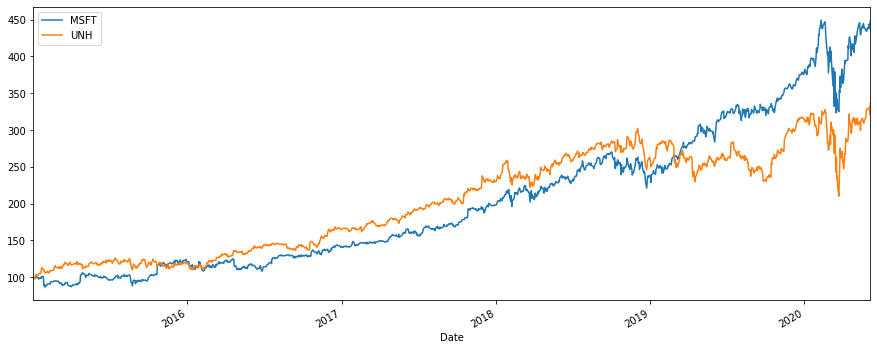

In [86]:
(pf_data / pf_data.iloc[0]*100).plot(figsize=(15,6))

In [87]:
log_returns = np.log(pf_data / pf_data.shift(1))
log_returns.mean()*250

MSFT    0.274819
UNH     0.222071
dtype: float64

In [88]:
log_returns.cov()*250

,MSFT,UNH
MSFT,0.074959,0.042289
UNH,0.042289,0.078191


In [89]:
log_returns.corr()

,MSFT,UNH
MSFT,1.000000,0.552374
UNH,0.552374,1.000000


In [90]:
num_assets = len(assets)
num_assets

2

In [91]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.52583081, 0.47416919])

Expected Portfolio Return

In [103]:
np.sum(weights * log_returns.mean())*252

0.26965115790277944

Expected Portfolio Variance

In [99]:
np.dot(weights.T, np.dot(log_returns.cov() *252, weights))

0.07201043639789942

In [108]:
print(f"Expected Portfolio Return: {round(np.sum(weights * log_returns.mean())*252*100,2)}%")
print(f"Expected Portfolio Variance: {round(100*np.dot(weights.T, np.dot(log_returns.cov() *252, weights)),2)}%")
print(f"Expected Portfolio Volatility: {round(100*np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights))),2)}%")

Expected Portfolio Return: 26.97%
Expected Portfolio Variance: 6.78%
Expected Portfolio Volatility: 26.03%


Expected Portfolio Volatility

In [100]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights)))

0.26834760367459853

In [101]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    pfolio_returns.append(np.sum(weights*log_returns.mean())*252)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

In [96]:
portfolios = pd.DataFrame({'Return':pfolio_returns,'Volatility':pfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.236328,0.252572
1,0.240835,0.247640
2,0.244466,0.245084
3,0.230477,0.261704
4,0.274028,0.272019


Text(0, 0.5, 'Expected Return')

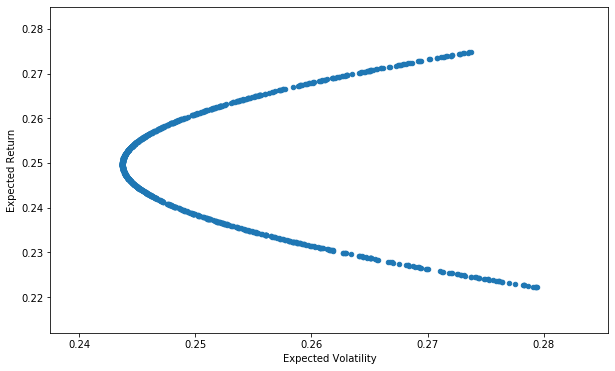

In [97]:
portfolios.plot(x='Volatility',y='Return', kind='scatter', figsize=(10,6))
#plt.axis([0,])
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')